# Image Compression using K-means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from KMeans import KMeans

%matplotlib inline

### Load an image as NumPy ndarray from the current folder.
To perform image compression with k-means, let's load an image from the current folder and save it as ndarray.  
**Note:** To load a different image set **FILE="path_to_your_image_file"**

In [2]:
# FILE = "dandelion.jpg"
# FILE = "beach.jpg"
# FILE = "bird.jpg"
FILE = "flowers.jpg"
# FILE = "sunrise.jpg"
# FILE = "rose.jpg"
with Image.open(FILE) as im:
    im.load()

img = np.asarray(im)

Let's save original shape of the loaded image for the later use.

In [3]:
orig_shape = img.shape

We can view the original image.

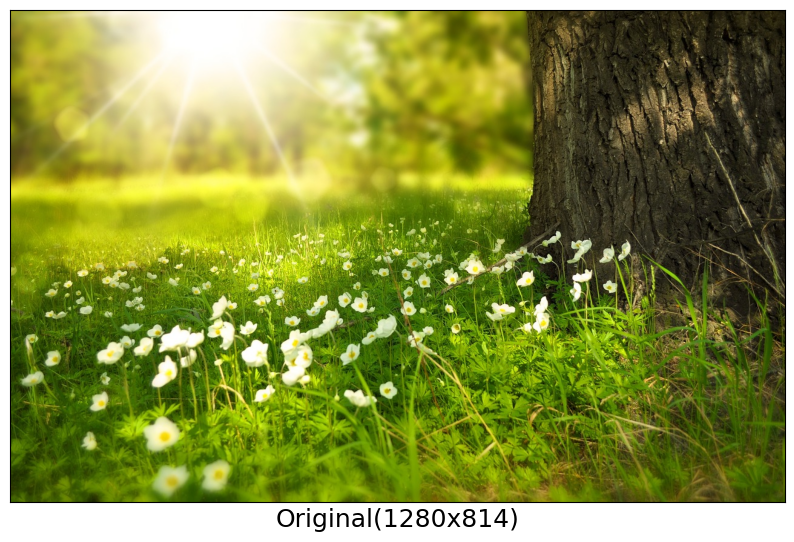

In [4]:
def show_image(img: np.ndarray):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlabel("Original({}x{})".format(img.shape[1],img.shape[0]), fontsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img)

show_image(img)

### Processing Data (Normalize and Reshape).
* Normalize image data by dividing it by 255. for faster computations. 
* Reshape the image data into an n x 3 matrix where n = number of pixels

In [5]:
# Image.fromarray(img.astype(np.uint8)).save(FILE+".png")

# Normailize image data by dividing it by 255. for faster computations. 
img = img / 255.

# Reshape the image data into an n x 3 matrix where n = number of pixels
x_flat = np.reshape(img, (img.shape[0] * img.shape[1] , img.shape[2]))

Let's view the shape of image data matrix.

In [6]:
x_flat.shape

(1041920, 3)

### Performing K-means on image pixels.
* Initializing models by calling KMeans() with required parameters.
* Perform K-means by calling model.fit()

Let's initialize 3 models corresponding to 3 compressed images with different **cluster** sizes.  

In [7]:
# X: Vector for performing K-means.  
# K: Number of clusters.  
# max_iters: Maximum number of iterations for a single run.  
# iters: Maximum number of times to run K-means. The final result will  
#        have the best(have low distortion) of 'iters' runs. Default = 1.  

# Initializing 3 models with cluster sizes 4, 8, and 16.
# Setting max_iters = 10.
# Setting iters = 5. This will return the best of 5.
model1 = KMeans(X=x_flat, K=4, max_iters=10, iters=5)
model2 = KMeans(X=x_flat, K=8, max_iters=10, iters=5)
model3 = KMeans(X=x_flat, K=16, max_iters=10, iters=5)

Perform K-means on the above models to find the closest centroid of each pixel.  
KMeans.fit() returns: (centroids, centroid_idx, min_distortion)

In [8]:
# Fitting model1.
centroids1, centroid_idx1, _ = model1.fit()

K-means Iteration: 1, Iteration: 1 Current Distortion: 0.2166123464416428
K-means Iteration: 1, Iteration: 2 Current Distortion: 0.18518512090563782
K-means Iteration: 1, Iteration: 3 Current Distortion: 0.17123376485964711
K-means Iteration: 1, Iteration: 4 Current Distortion: 0.1617704841871998
K-means Iteration: 1, Iteration: 5 Current Distortion: 0.15391867851782653
K-means Iteration: 1, Iteration: 6 Current Distortion: 0.14863586197701123
K-means Iteration: 1, Iteration: 7 Current Distortion: 0.14547918312511998
K-means Iteration: 1, Iteration: 8 Current Distortion: 0.14359996966422475
K-means Iteration: 1, Iteration: 9 Current Distortion: 0.14248393984872076
K-means Iteration: 1, Iteration: 10 Current Distortion: 0.1418545193245731
K-means Iteration: 1, Distortion: 0.1418545193245731, Best: (1, 0.1418545193245731)

K-means Iteration: 2, Iteration: 1 Current Distortion: 0.15939233969195887
K-means Iteration: 2, Iteration: 2 Current Distortion: 0.14612557090258627
K-means Iteration

In [9]:
# Fitting model2.
centroids2, centroid_idx2, _ = model2.fit()

K-means Iteration: 1, Iteration: 1 Current Distortion: 0.13454143523852713
K-means Iteration: 1, Iteration: 2 Current Distortion: 0.1170516477703428
K-means Iteration: 1, Iteration: 3 Current Distortion: 0.10924248741621147
K-means Iteration: 1, Iteration: 4 Current Distortion: 0.10574037807014848
K-means Iteration: 1, Iteration: 5 Current Distortion: 0.10424727052171026
K-means Iteration: 1, Iteration: 6 Current Distortion: 0.1035976388788815
K-means Iteration: 1, Iteration: 7 Current Distortion: 0.10326240916311813
K-means Iteration: 1, Iteration: 8 Current Distortion: 0.10300155758972893
K-means Iteration: 1, Iteration: 9 Current Distortion: 0.10270195252784071
K-means Iteration: 1, Iteration: 10 Current Distortion: 0.1023283998874925
K-means Iteration: 1, Distortion: 0.1023283998874925, Best: (1, 0.1023283998874925)

K-means Iteration: 2, Iteration: 1 Current Distortion: 0.12007353640582925
K-means Iteration: 2, Iteration: 2 Current Distortion: 0.10908526655911314
K-means Iteration

In [10]:
# Fitting model3.
centroids3, centroid_idx3, _ = model3.fit()

K-means Iteration: 1, Iteration: 1 Current Distortion: 0.08081942383512343
K-means Iteration: 1, Iteration: 2 Current Distortion: 0.07424556912775415
K-means Iteration: 1, Iteration: 3 Current Distortion: 0.07154419125951418
K-means Iteration: 1, Iteration: 4 Current Distortion: 0.07015049025469186
K-means Iteration: 1, Iteration: 5 Current Distortion: 0.06971289895950113
K-means Iteration: 1, Iteration: 6 Current Distortion: 0.06953694931902801
K-means Iteration: 1, Iteration: 7 Current Distortion: 0.06943835649795896
K-means Iteration: 1, Iteration: 8 Current Distortion: 0.06937760948236726
K-means Iteration: 1, Iteration: 9 Current Distortion: 0.06932874819904125
K-means Iteration: 1, Iteration: 10 Current Distortion: 0.0692936701334477
K-means Iteration: 1, Distortion: 0.0692936701334477, Best: (1, 0.0692936701334477)

K-means Iteration: 2, Iteration: 1 Current Distortion: 0.07754937397591861
K-means Iteration: 2, Iteration: 2 Current Distortion: 0.07172622096732424
K-means Iterati

### Creating images from the compressed data and Restoring their pixel's color values.   
Replace each pixel with the RGB values(Color) of the closest centroid for above the 3 models.

In [11]:
x_compressed1 = centroids1[centroid_idx1, :]
x_compressed2 = centroids2[centroid_idx2, :]
x_compressed3 = centroids3[centroid_idx3, :]

Multiplying x_compressed data ndarray with 255. to restore color values.

In [12]:
x_compressed1 = x_compressed1 * 255.
x_compressed2 = x_compressed2 * 255.
x_compressed3 = x_compressed3 * 255.

Create images from the compressed data by changing it's shape back to the original shape.

In [15]:
# We also have to change the type of ndarray to np.uint8(data type containing numbers ranging from 0 to 255).
img1 = np.reshape(x_compressed1, orig_shape).astype(np.uint8)
img2 = np.reshape(x_compressed2, orig_shape).astype(np.uint8)
img3 = np.reshape(x_compressed3, orig_shape).astype(np.uint8)

### Visulaizing all the images.  
Let's display all the images side by side.

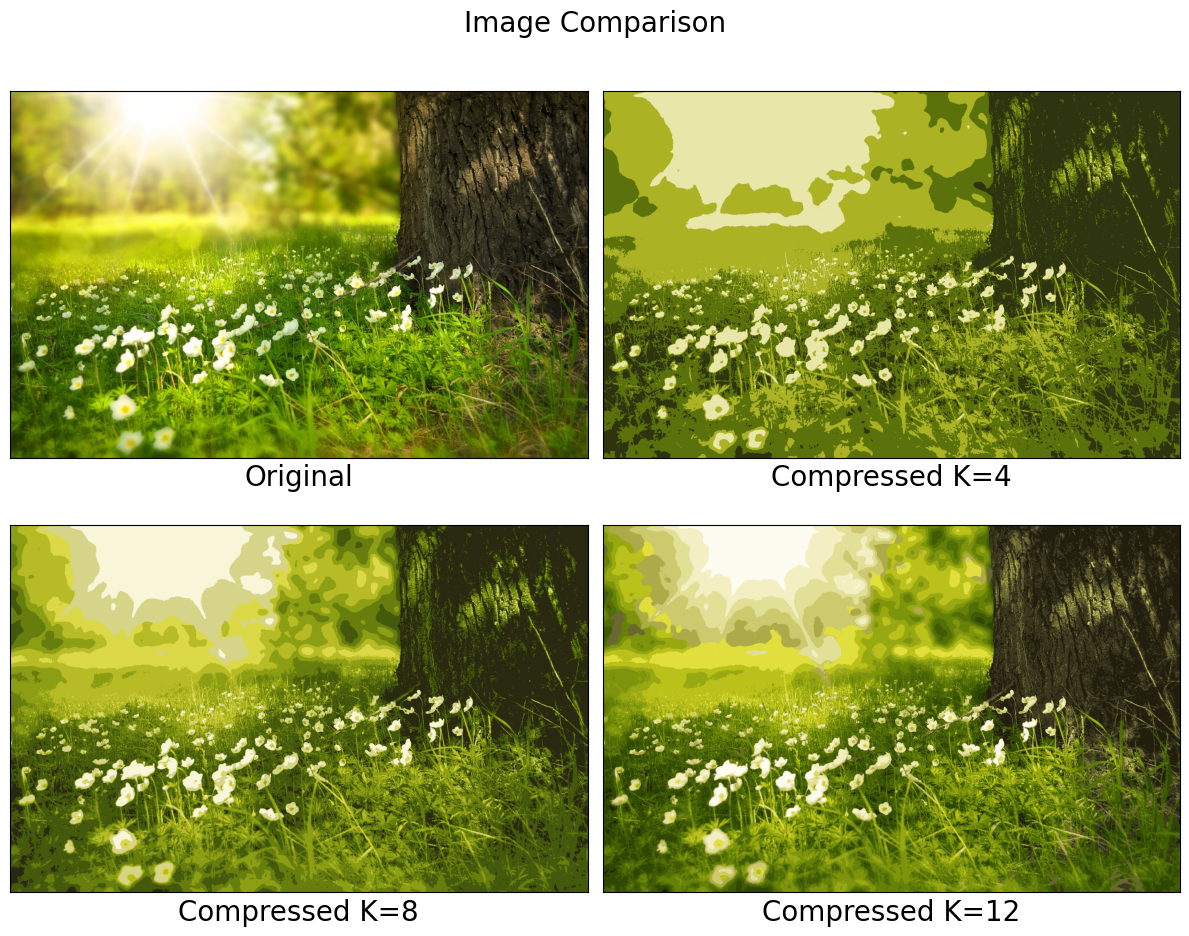

In [18]:
# Below code displays 4 images(1 original and 3 compressed) above side by side.

def visualize_images(img1, img2, img3, img4):
    # Create a figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 9.6))
    
    # Plot each image in a subplot
    axes[0, 0].imshow(img1)
    axes[0, 0].set_xlabel("Original", fontsize=20)
    # axes[0, 0].set_title("Original")
    
    axes[0, 1].imshow(img2)
    axes[0, 1].set_xlabel("Compressed K=4", fontsize=20)
    # axes[0, 1].set_title("Compressed K=4")
    
    axes[1, 0].imshow(img3)
    axes[1, 0].set_xlabel("Compressed K=8", fontsize=20)
    # axes[1, 0].set_title("Compressed K=8")
    
    axes[1, 1].imshow(img4)
    axes[1, 1].set_xlabel("Compressed K=12", fontsize=20)
    # axes[1, 1].set_title("Compressed K=16")
    
    # Hide axis labels and ticks
    for ax in axes.flat:
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Display the images
    fig.suptitle('Image Comparison', fontsize=20)
    plt.tight_layout()
    plt.show()

visualize_images(img, img1, img2, img3)

### **Optional**: Save compressed images.  
Run the below cell to save the images.

In [22]:
Image.fromarray(img1).save("compressed_img1.png")
Image.fromarray(img2).save("compressed_img2.png")
Image.fromarray(img3).save("compressed_img3.png")